In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

(CVXPY) Oct 12 03:12:24 PM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Create parameters

In [2]:
params = ob.ics_params(num_row=200, num_col=300, num_agents=20)

# Distributed solution with limited memory $m$

In [3]:
agents = ob.ics_agents(params)
g = ob.ics_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 30
memory = [10, 20, max_iter]
memory_bounds = {}
for m in memory:
    prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=max_iter, memory=m)
    memory_bounds[m] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

k=0, rel_gap=inf, L=0.0, U=9.329450643593114
k=1, rel_gap=inf, L=0.0, U=9.329450643593114
k=2, rel_gap=inf, L=0.0, U=5.344990318509176
k=3, rel_gap=inf, L=0.0, U=3.079043182529117
k=4, rel_gap=inf, L=0.0, U=1.776826231465051
k=5, rel_gap=inf, L=0.0, U=1.0248163532658774
k=6, rel_gap=inf, L=0.0, U=0.5900897317687694
k=7, rel_gap=inf, L=0.0, U=0.33909126585867727
k=8, rel_gap=inf, L=0.0, U=0.19465010532081642
k=9, rel_gap=inf, L=0.0, U=0.11169115888474337
k=10, rel_gap=12685018.081885878, L=5.038875192439583e-09, U=0.06391822796733748
k=11, rel_gap=338796.36192156153, L=1.075137840567877e-07, U=0.036425386408644116
k=12, rel_gap=167371.91851465372, L=1.2344395717460248e-07, U=0.020661175385311144
k=13, rel_gap=598443.6238305782, L=1.9524079276855828e-08, U=0.011684080278476372
k=14, rel_gap=142053.54926774692, L=4.640328498395989e-08, U=0.006591797732939231
k=15, rel_gap=451372.6702524458, L=8.229975796143643e-09, U=0.003714794381194151
k=16, rel_gap=402764.2902682855, L=5.19666577164749

# Centralized solution

In [5]:
h_cvx = ob.cvx_intersection_cvx_sets(params=params)[2]

# Plot

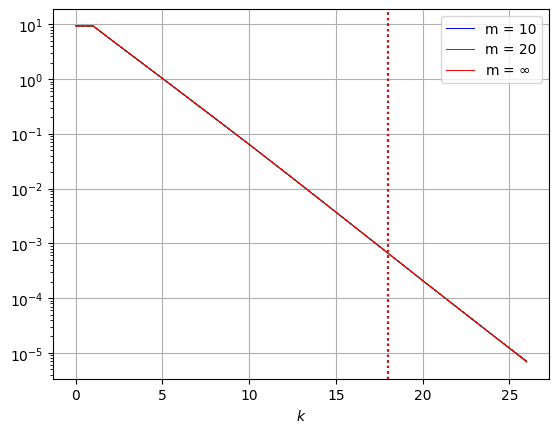

In [6]:
ob.plot_finite_memory_abs(memory_bounds=memory_bounds, memory=memory, h_true=h_cvx)